In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf
from datetime import datetime

# 1. Data Collection


In [70]:
now = datetime.now()

start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AAPL' #apple stock shortform
df = yf.download(ticker, start, end)
df


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-06,28.440775,28.476508,27.766326,27.797592,148776000
2015-04-07,28.141518,28.612737,28.134818,28.505541,140049200
2015-04-08,28.049957,28.228620,27.909261,28.105789,149316800
2015-04-09,28.264351,28.268818,27.840030,28.105788,129936000
2015-04-10,28.384945,28.409511,27.974023,28.128118,160752000
...,...,...,...,...,...
2025-03-31,222.130005,225.619995,216.229996,217.009995,65299300
2025-04-01,223.190002,223.679993,218.899994,219.809998,36412700


In [71]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-06,28.440775,28.476508,27.766326,27.797592,148776000
2015-04-07,28.141518,28.612737,28.134818,28.505541,140049200
2015-04-08,28.049957,28.228620,27.909261,28.105789,149316800
2015-04-09,28.264351,28.268818,27.840030,28.105788,129936000
2015-04-10,28.384945,28.409511,27.974023,28.128118,160752000


### 2. Data Exploration and Visualization

In [72]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [73]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,99.320723,100.301379,98.236255,99.231440,1.126167e+08
std,68.152151,68.802817,67.414531,68.080007,6.552259e+07
min,20.674536,20.978902,20.475435,20.596719,2.323470e+07
25%,36.785107,37.254266,36.464320,36.815548,6.897480e+07
50%,74.962799,75.698802,74.044686,74.971822,9.678320e+07
75%,157.484283,159.960990,155.558020,157.652445,1.372504e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [74]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [75]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-06,28.440775,28.476508,27.766326,27.797592,148776000
2015-04-07,28.141518,28.612737,28.134818,28.505541,140049200
2015-04-08,28.049957,28.228620,27.909261,28.105789,149316800
2015-04-09,28.264351,28.268818,27.840030,28.105788,129936000
2015-04-10,28.384945,28.409511,27.974023,28.128118,160752000


In [76]:
df.reset_index(inplace=True)

In [77]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-04-06,28.440775,28.476508,27.766326,27.797592,148776000
1,2015-04-07,28.141518,28.612737,28.134818,28.505541,140049200
2,2015-04-08,28.049957,28.228620,27.909261,28.105789,149316800
3,2015-04-09,28.264351,28.268818,27.840030,28.105788,129936000
4,2015-04-10,28.384945,28.409511,27.974023,28.128118,160752000


Text(0, 0.5, 'Close Price')

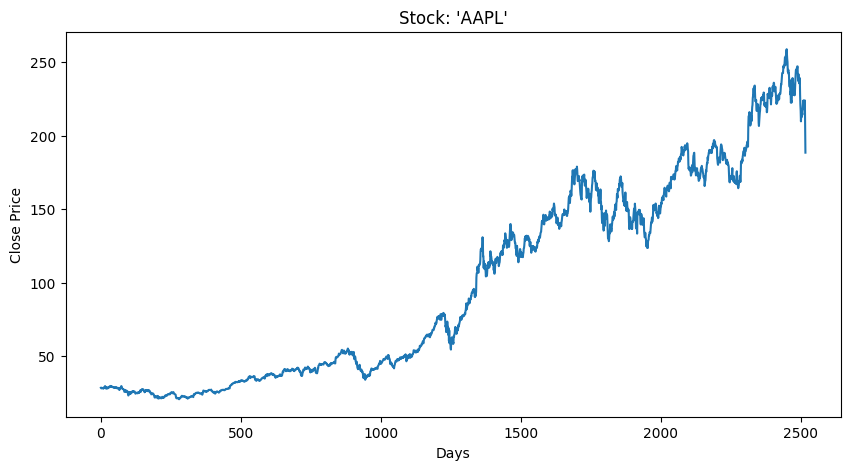

In [78]:
plt.figure(figsize=(10,5))
plt.plot(df['Close']);
plt.title(f"Stock: '{ticker}'")
plt.xlabel('Days')
plt.ylabel('Close Price')


#### 3. Feature Engineering

In [79]:
## as stock price 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 this are stock price
## MA (moving average): (10+20+30+40+50)//50 for 5 days
### null, null, null, null,[30, 40, 50, 60, 70]

In [80]:
temp_stock = [10, 20, 30, 40, 50, 60, 70, 80, 90,100]
value = []

for i in range(5,10):
    value.append(((sum(temp_stock[i-5:i]))//5))
value


[30, 40, 50, 60, 70]

In [81]:
temp_val = [10, 20, 30, 40, 50, 60, 70, 80, 90,100]
temp_df = pd.DataFrame(temp_val)
temp_df



,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [82]:
temp_df['MA_5'] = temp_df.rolling(5).mean()
temp_df

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [83]:
### 10days moving average
df['Moving_Average_100_days'] = df['Close'].rolling(100).mean()
df

Price,Date,Close,High,Low,Open,Volume,Moving_Average_100_days
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-04-06,28.440775,28.476508,27.766326,27.797592,148776000,NaN
1,2015-04-07,28.141518,28.612737,28.134818,28.505541,140049200,NaN
2,2015-04-08,28.049957,28.228620,27.909261,28.105789,149316800,NaN
3,2015-04-09,28.264351,28.268818,27.840030,28.105788,129936000,NaN
4,2015-04-10,28.384945,28.409511,27.974023,28.128118,160752000,NaN
...,...,...,...,...,...,...,...
2512,2025-03-31,222.130005,225.619995,216.229996,217.009995,65299300,234.514269
2513,2025-04-01,223.190002,223.679993,218.899994,219.809998,36412700,234.530945
2514,2025-04-02,223.889999,225.190002,221.020004,221.320007,35905900,234.540252


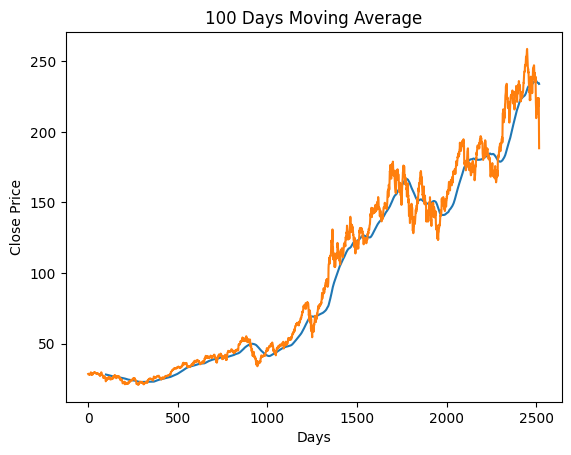

In [84]:
plt.plot(df['Moving_Average_100_days']);
plt.plot(df['Close']);
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('100 Days Moving Average');
# the above is used to get smooth curve


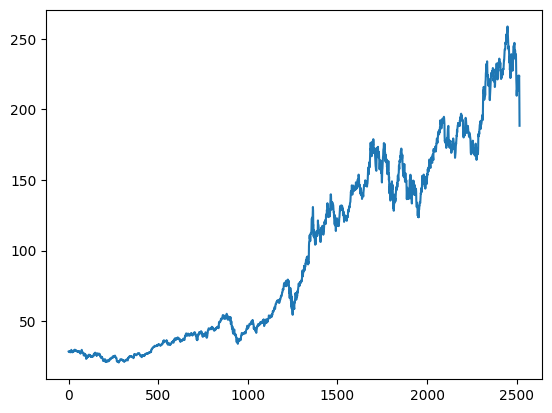

In [85]:
plt.plot(df['Close']);

In [86]:
df.index = range(1, len(df) + 1)

In [87]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,Moving_Average_100_days
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
1,2015-04-06,28.440775,28.476508,27.766326,27.797592,148776000,NaN
2,2015-04-07,28.141518,28.612737,28.134818,28.505541,140049200,NaN
3,2015-04-08,28.049957,28.228620,27.909261,28.105789,149316800,NaN
4,2015-04-09,28.264351,28.268818,27.840030,28.105788,129936000,NaN
5,2015-04-10,28.384945,28.409511,27.974023,28.128118,160752000,NaN
...,...,...,...,...,...,...,...
99,2015-08-24,23.230427,24.509993,20.725361,21.371903,648825200,NaN
100,2015-08-25,23.370098,25.030380,23.316032,25.030380,414406400,28.022507
101,2015-08-26,24.710484,24.755538,23.665205,24.124766,387098400,27.985204


In [88]:
df.columns

MultiIndex([(                   'Date',     ''),
            (                  'Close', 'AAPL'),
            (                   'High', 'AAPL'),
            (                    'Low', 'AAPL'),
            (                   'Open', 'AAPL'),
            (                 'Volume', 'AAPL'),
            ('Moving_Average_100_days',     '')],
           names=['Price', 'Ticker'])

In [89]:
df.columns.get_level_values(0)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Moving_Average_100_days'],
      dtype='object', name='Price')

In [90]:
if 'index' in df.columns.get_level_values(0):
    df = df.drop(columns='index')


In [91]:
df

Price,Date,Close,High,Low,Open,Volume,Moving_Average_100_days
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
1,2015-04-06,28.440775,28.476508,27.766326,27.797592,148776000,NaN
2,2015-04-07,28.141518,28.612737,28.134818,28.505541,140049200,NaN
3,2015-04-08,28.049957,28.228620,27.909261,28.105789,149316800,NaN
4,2015-04-09,28.264351,28.268818,27.840030,28.105788,129936000,NaN
5,2015-04-10,28.384945,28.409511,27.974023,28.128118,160752000,NaN
...,...,...,...,...,...,...,...
2513,2025-03-31,222.130005,225.619995,216.229996,217.009995,65299300,234.514269
2514,2025-04-01,223.190002,223.679993,218.899994,219.809998,36412700,234.530945
2515,2025-04-02,223.889999,225.190002,221.020004,221.320007,35905900,234.540252


In [92]:
## 200days moving average
df['Moving_Average_200_days'] = df['Close'].rolling(200).mean()


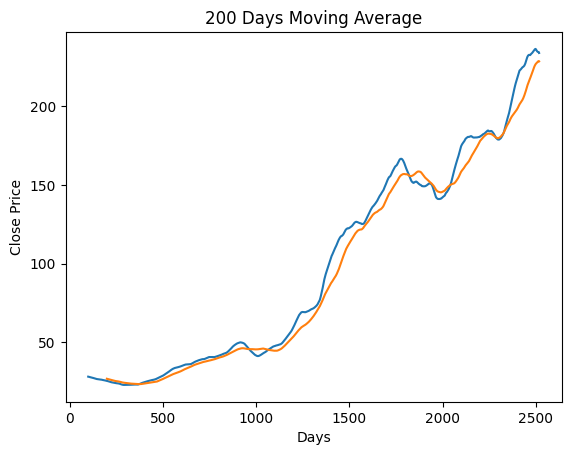

In [93]:
plt.plot(df['Moving_Average_100_days']);
plt.plot(df['Moving_Average_200_days']);
# plt.plot(df['Close'],'r');
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('200 Days Moving Average');
# plt.grid()
# the above is used to get smooth curve

In [94]:
df

Price,Date,Close,High,Low,Open,Volume,Moving_Average_100_days,Moving_Average_200_days
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
1,2015-04-06,28.440775,28.476508,27.766326,27.797592,148776000,NaN,NaN
2,2015-04-07,28.141518,28.612737,28.134818,28.505541,140049200,NaN,NaN
3,2015-04-08,28.049957,28.228620,27.909261,28.105789,149316800,NaN,NaN
4,2015-04-09,28.264351,28.268818,27.840030,28.105788,129936000,NaN,NaN
5,2015-04-10,28.384945,28.409511,27.974023,28.128118,160752000,NaN,NaN
...,...,...,...,...,...,...,...,...
2513,2025-03-31,222.130005,225.619995,216.229996,217.009995,65299300,234.514269,228.708341
2514,2025-04-01,223.190002,223.679993,218.899994,219.809998,36412700,234.530945,228.762510
2515,2025-04-02,223.889999,225.190002,221.020004,221.320007,35905900,234.540252,228.814348


In [97]:
## calculating % changed in each trading session 
df['Percentage_changed'] = df.Close.pct_change()

In [98]:
df

Price,Date,Close,High,Low,Open,Volume,Moving_Average_100_days,Moving_Average_200_days,Percentage_changed
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,
1,2015-04-06,28.440775,28.476508,27.766326,27.797592,148776000,NaN,NaN,NaN
2,2015-04-07,28.141518,28.612737,28.134818,28.505541,140049200,NaN,NaN,-0.010522
3,2015-04-08,28.049957,28.228620,27.909261,28.105789,149316800,NaN,NaN,-0.003254
4,2015-04-09,28.264351,28.268818,27.840030,28.105788,129936000,NaN,NaN,0.007643
5,2015-04-10,28.384945,28.409511,27.974023,28.128118,160752000,NaN,NaN,0.004267
...,...,...,...,...,...,...,...,...,...
2513,2025-03-31,222.130005,225.619995,216.229996,217.009995,65299300,234.514269,228.708341,0.019413
2514,2025-04-01,223.190002,223.679993,218.899994,219.809998,36412700,234.530945,228.762510,0.004772
2515,2025-04-02,223.889999,225.190002,221.020004,221.320007,35905900,234.540252,228.814348,0.003136


In [99]:
df[['Close', 'Percentage_changed']]

Price,Close,Percentage_changed
Ticker,AAPL,
1,28.440775,NaN
2,28.141518,-0.010522
3,28.049957,-0.003254
4,28.264351,0.007643
5,28.384945,0.004267
...,...,...
2513,222.130005,0.019413
2514,223.190002,0.004772
2515,223.889999,0.003136


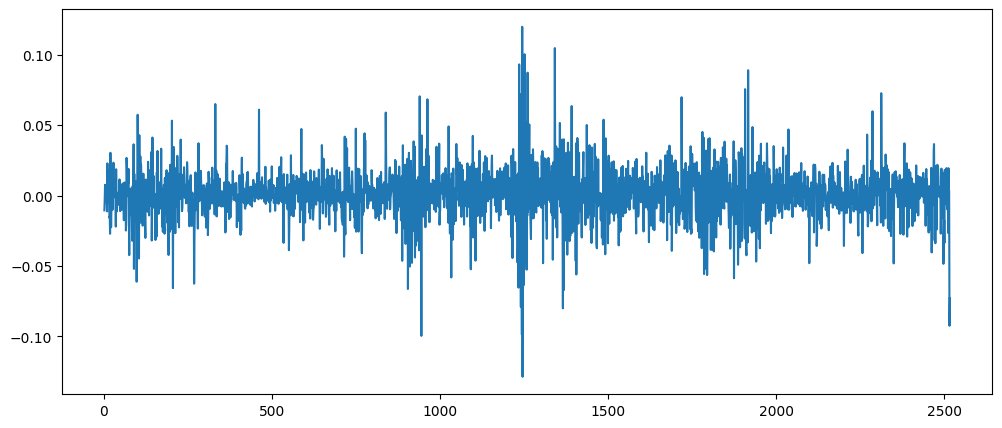

In [100]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage_changed'])


### 4. Data Preprocessing


In [102]:
df.shape

(2517, 9)

In [108]:
## Spliting data into Training & Testing Data sets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):])
data_training

Ticker,AAPL
1,28.440775
2,28.141518
3,28.049957
4,28.264351
5,28.384945
...,...
1757,171.294434
1758,171.934097
1759,172.800034
1760,176.106461


In [107]:
data_testing    


Ticker,AAPL
1762,171.825836
1763,171.530594
1764,175.594788
1765,172.268631
1766,169.090149
...,...
2513,222.130005
2514,223.190002
2515,223.889999
2516,203.190002


In [110]:
## scaling down the data btw 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'